## VGG16 
### DATASET : CK+

**Setup**

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy

**Importing the data**

In [4]:
import os,cv2
directory = '../dataset/ck+'
dir_list = os.listdir(directory)
image_data_list = []
labels = []
emotions = []
l = 0

for data_dir in dir_list:
    data_list = os.listdir(directory+'/'+data_dir)
    for img in data_list:
        input_img = cv2.imread(directory+'/'+data_dir+'/'+img)
        input_img = cv2.resize(input_img,(64,64))
        image_data_list.append(input_img)
        labels.append(l)
    emotions.append(data_dir)
    l=l+1
    
img_data = np.array(image_data_list)
img_data = img_data/255
img_data.shape

(981, 64, 64, 3)

**Analyzing the dataset**

In [5]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:29] = 0 #30
labels[30:58] = 1 #29
labels[59:90] = 2 #32
labels[91:121] = 3 #31
labels[122:151] = 4 #30
labels[152:182] = 5 #31
labels[183:] = 6 #30

names = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']

def getLabel(id):
    return ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'][id]

In [6]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:29] = 0 #30
labels[30:58] = 1 #29
labels[59:90] = 2 #32
labels[91:121] = 3 #31
labels[122:151] = 4 #30
labels[152:182] = 5 #31
labels[183:] = 6 #30

names = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']

def getLabel(id):
    return ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'][id]

Train-Validation-Test Split **(80-10-10)**

In [7]:
num_classes = 7

Y = keras.utils.to_categorical(labels, num_classes)

X_train, X_t, y_train, y_t = train_test_split(img_data, Y, test_size=0.5, shuffle = True, random_state = 20) 

X_val, X_test, y_val, y_test = train_test_split(X_t, y_t, test_size = 0.5, shuffle = False)

**Visualising the dataset**

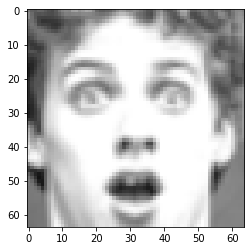

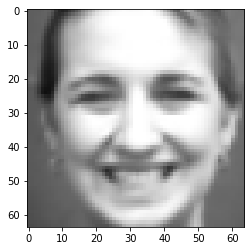

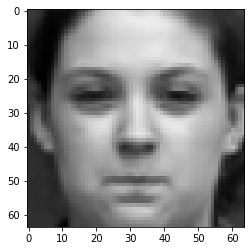

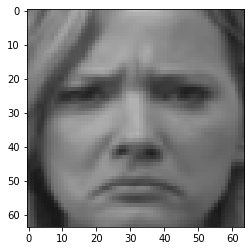

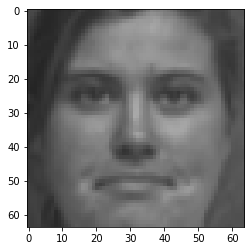

In [8]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.imshow(X_train[i])
    plt.show()

**Building the model**

In [9]:
import keras
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.layers import (Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Concatenate, LeakyReLU, BatchNormalization, concatenate)

In [10]:
#EVALUATION

import keras.backend as K

def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [11]:
#EVALUATION

METRICS = [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall'),  
           tf.keras.metrics.AUC(name='auc'), f1_score]

In [12]:
# img_rows, img_colums, color_channels
input_shape = (64, 64, 3)

model = models.Sequential()

model.add(Conv2D(64, (3, 3), input_shape = input_shape, activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(256, (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(512, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(512, (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(512, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(512, (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
    
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss = "categorical_crossentropy", metrics = METRICS)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       1

**Training the model**

In [13]:
history = model.fit(X_train, y_train, epochs = 90, validation_data = (X_val,y_val))

Epoch 1/90
16/16 [==============================] - 17s 314ms/step - loss: 1.2428 - accuracy: 0.8930 - precision: 0.7531 - recall: 0.3735 - auc: 0.8628 - f1_score: 0.4797 - val_loss: 2.4856 - val_accuracy: 0.9143 - val_precision: 0.7988 - val_recall: 0.5347 - val_auc: 0.8885 - val_f1_score: 0.6425
Epoch 2/90
16/16 [==============================] - 1s 61ms/step - loss: 0.8790 - accuracy: 0.9364 - precision: 0.8350 - recall: 0.6918 - auc: 0.9138 - f1_score: 0.7585 - val_loss: 1.3453 - val_accuracy: 0.8636 - val_precision: 0.7200 - val_recall: 0.0735 - val_auc: 0.8746 - val_f1_score: 0.1220
Epoch 3/90
16/16 [==============================] - 1s 62ms/step - loss: 0.8760 - accuracy: 0.9434 - precision: 0.8333 - recall: 0.7551 - auc: 0.9105 - f1_score: 0.7936 - val_loss: 0.9811 - val_accuracy: 0.9440 - val_precision: 0.8066 - val_recall: 0.8000 - val_auc: 0.8880 - val_f1_score: 0.8002
Epoch 4/90
16/16 [==============================] - 1s 62ms/step - loss: 0.8599 - accuracy: 0.9458 - precis

In [ ]:
# Save Model
models.save_model(model, 'ckp_vgg16.h5')

**Plotting accuracy and loss**

<Figure size 432x288 with 0 Axes>

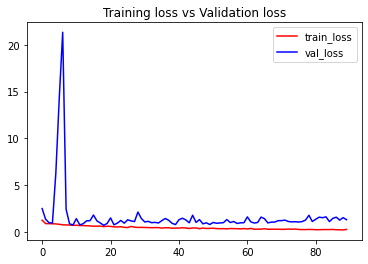

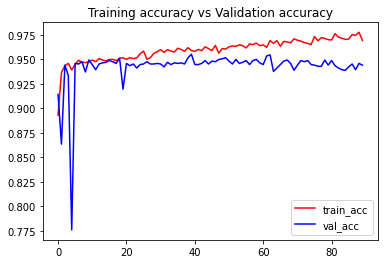

<Figure size 432x288 with 0 Axes>

In [14]:
# visualizing losses and accuracy
%matplotlib inline

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label = 'train_loss')
plt.plot(epochs,val_loss,'b', label = 'val_loss')
plt.title('Training loss vs Validation loss')
plt.legend()
plt.savefig('trainloss.png')
plt.figure()

plt.plot(epochs,train_acc,'r', label = 'train_acc')
plt.plot(epochs,val_acc,'b', label = 'val_acc')
plt.title('Training accuracy vs Validation accuracy')
plt.legend()
plt.savefig('trainacc.png')
plt.figure()

# Quantitative Prediction


**Accuracy and Loss**

In [25]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_auc = history.history['auc']
val_auc = history.history['val_auc']

In [26]:
#EVALUATION

print('Train Accuracy: ', round(history.history['accuracy'][-1],2))
print('Train Loss: ', round(history.history['loss'][-1],2))
print('Train Precision: ', round(history.history['precision'][-1],2))
print('Train Recall: ', round(history.history['recall'][-1],2))
print('Train F1-Score: ', round(history.history['f1_score'][-1],2))

Train Accuracy:  0.97
Train Loss:  0.26
Train Precision:  0.91
Train Recall:  0.88
Train F1-Score:  0.88


In [27]:
#EVALUATION

print('Test Accuracy: ', round(history.history['val_accuracy'][-1],2))
print('Test Loss: ', round(history.history['val_loss'][-1],2))
print('Test Precision: ', round(history.history['val_precision'][-1],2))
print('Test Recall: ', round(history.history['val_recall'][-1],2))
print('Test F1-Score: ', round(history.history['val_f1_score'][-1],2))

Test Accuracy:  0.94
Test Loss:  1.3
Test Precision:  0.81
Test Recall:  0.79
Test F1-Score:  0.8


**Confusion Matrix**

In [15]:
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)

8/8 [==============================] - 1s 98ms/step


In [16]:
# evaluate model on test set
acc = model.evaluate(X_test,y_test)
print ("model %s: %.2f%%" % (model.metrics_names[1], acc[1]*100))

8/8 [==============================] - 0s 15ms/step - loss: 1.3351 - accuracy: 0.9384 - precision: 0.8017 - recall: 0.7561 - auc: 0.9319 - f1_score: 0.7789
model accuracy: 93.84%


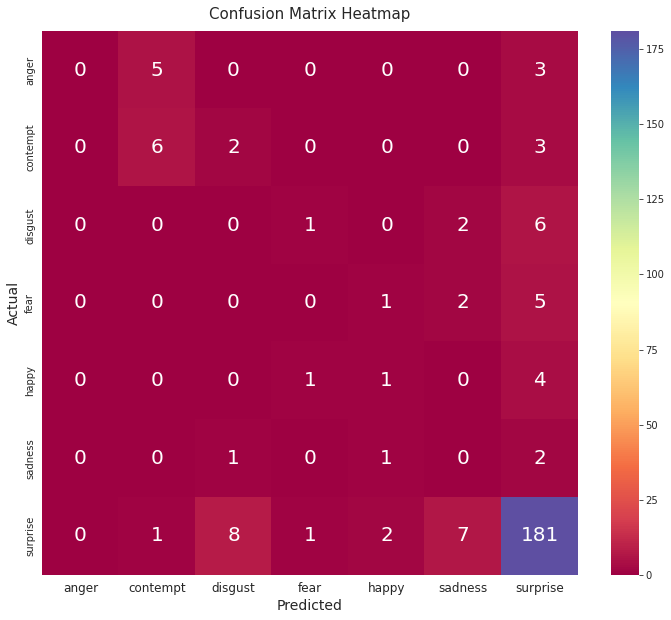

In [17]:
conf_mat = confusion_matrix(np.where(y_test == 1)[1],Y_pred)
sns.set_style(style='dark')
plt.figure(figsize=(12,10))
heatmap = sns.heatmap(conf_mat,vmin=np.min(conf_mat.all()), vmax=np.max(conf_mat), annot=True,fmt='d', annot_kws={"fontsize":20},cmap='Spectral')
heatmap.set_title('Confusion Matrix Heatmap', fontdict={'fontsize':15}, pad=12)
heatmap.set_xlabel('Predicted',fontdict={'fontsize':14})
heatmap.set_ylabel('Actual',fontdict={'fontsize':14})
heatmap.set_xticklabels(['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'], fontdict={'fontsize':12})
heatmap.set_yticklabels(['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'], fontdict={'fontsize':10})
plt.show()

# Qualitative Prediction

Test Loss: 1.3350720405578613
Test accuracy: 0.938443660736084
1/1 [==============================] - 0s 16ms/step
[6 1 6 6 6 5 6 6 6]
[6 0 6 6 6 6 6 6 6]


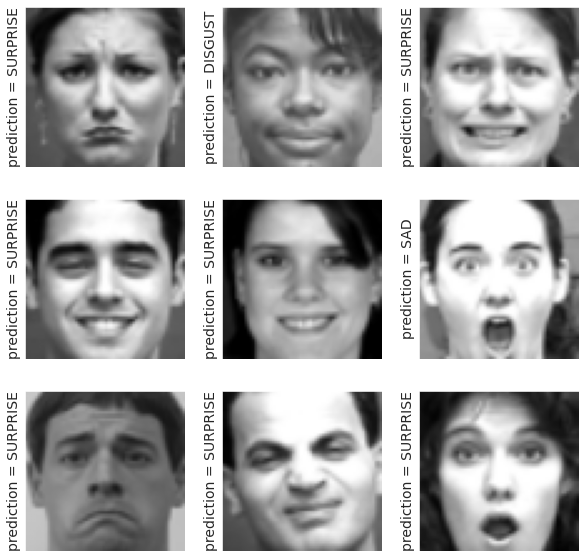

In [28]:
# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

res = model.predict(X_test[:9]).argmax(axis=-1)
print(res)
print(y_test[:9].argmax(axis=-1))
plt.figure(figsize=(10, 10))

for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_test[i],cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)

# show the plot
plt.show()